In [30]:
import numpy as np
import scipy
import scipy.integrate
import numpy.polynomial.legendre
import matplotlib.pyplot as plt

In [26]:
# set up function
f = lambda x : 1 / np.sqrt(1 + x**2)

# use scipy's built-in quadrature function to check results
scipy.integrate.quad(f, 0, 5)[0]

2.3124383412727525

## Part 1 - Gauss-Legendre Quadrature

In [24]:
# bounds of integration [a,b]
a = 0; b = 5
# number of gauss-legendre nodes to use
n = 5

# gauss-legendre weights
w = np.polynomial.legendre.leggauss(n)[1]
# gauss-legendre nodes
x = np.polynomial.legendre.leggauss(n)[0]

# apply transformation of integral from [a,b] to [-1,1] and solve using Gauss-Legendre quadrature with n nodes
(b - a) / 2 * np.sum([w[i] * f((b - a) / 2 * x[i] + (b + a) / 2) for i in range(n)])

2.3112873414551993

## Part 2 - Monte Carlo Integration

In [62]:
# bounds of integration [a,b]
a = -1; b = 10
# number of points to sample
ns = [10e2, 10e3, 10e4, 10e5, 10e6, 10e7]

Q = []
for n in ns:
    print(n)
    # sample uniform-random x_i on the domain
    x = np.random.uniform(low=a, high=b, size=int(n))
    # approximation of the integral is the average function value f(x_i) over the domain (from MVT for integrals)
    integral = (b - a) * np.mean([f(xi) for xi in x])
    Q.append(integral)

1000.0
10000.0
100000.0
1000000.0
10000000.0
100000000.0


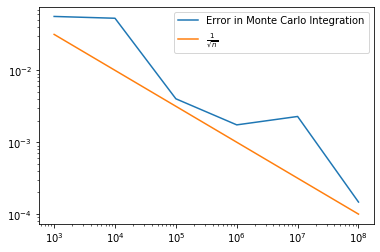

In [100]:
# plot error given exact value
Q_exact = 3.8795965
err = [abs(Qi - Q_exact) for Qi in Q]
plt.loglog(ns, err, label="Error in Monte Carlo Integration")
plt.loglog(ns, 1/np.sqrt(ns), label=r"$\frac{1}{\sqrt{n}}$")
plt.legend()

## Part 3 - Chebyshev Approximation

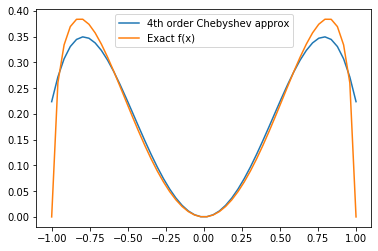

In [105]:
# function to approximate
f = lambda x : x**2 * np.sqrt(1 - x**2)

# domain [a,b]
a = -1; b = 1
# polynomial order of approximation
n = 4
# find the n+1 zeros of the (n+1)th-order chebyshev polynomial
x = [np.cos((2 * j + 1) * np.pi / (2*n + 2)) for j in range(n+1)]
# generate chebyshev polynomials
T = [numpy.polynomial.chebyshev.Chebyshev.basis(i) for i in range(n+1)]
# compute n+1 coefficients
a = [2 / (n+1) * np.sum([f(x[j]) * T[i](x[j]) for j in range(n+1)]) for i in range(n+1)]
a[0] = 1 / (n + 1) * np.sum([f(x[j]) for j in range(n+1)])
# reformat approximation as a lambda function so it can be used
f_approx = lambda x : np.sum([a[i] * T[i](x) for i in range(n+1)])
# plot resulting approximation
space = np.linspace(-1, 1)
plt.plot(space, [f_approx(space[i]) for i in range(len(space))], label="4th order Chebyshev approx")
plt.plot(space, [f(space[i]) for i in range(len(space))], label="Exact f(x)")
plt.legend()

In [106]:
print("Chebyshev coefficients a0 through a4:")
print(a)

Chebyshev coefficients a0 through a4:
[0.223606797749979, 4.4408920985006264e-17, 0.11180339887498947, -4.4408920985006264e-17, -0.11180339887498963]
